In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2] 

In [4]:
X

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

In [5]:
Y = iris.target

In [6]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

In [8]:
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [9]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

In [10]:
h=.02

In [11]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

In [12]:
Z = Z.reshape(xx.shape)

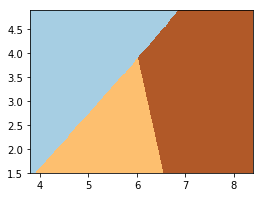

In [13]:
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

In [14]:
import numpy as np
import pandas as pd
import csv
from pandas import *
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/usr/lib/python3/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
def load_file_train():
    train_df = pd.read_csv("train.csv")
    cols = ["Pclass","Sex","Age"]
    #change male to 1 and female to 0
    train_df["Sex"] = train_df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
    #handle missing values of age
    train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
    train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].mean())
    survived = train_df["Survived"].values
    data = train_df[cols].values
    return survived,data

In [16]:
def load_file_test():
    train_df = pd.read_csv("test.csv")
    cols = ["Pclass","Sex","Age"]
    #change male to 1 and female to 0
    train_df["Sex"] = train_df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
    #handle missing values of age
    train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
    train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].mean())
    data = train_df[cols].values
    passId = train_df["PassengerId"].values
    return data,passId

In [21]:
def learn_model(survived,data_train,data_test,passId):
    model = LogisticRegression()
    model.fit(data_train,survived)
    predicted = model.predict(data_test)
    #evaluate_model(predicted,target_test)
    output = pd.DataFrame(columns=['PassengerId', 'Survived'])
    output['PassengerId'] = passId
    output['Survived'] = predicted.astype(int)
    output.to_csv('logisticRegressionSubmit.csv', index=False)

In [22]:
def main():
    survived, data_train = load_file_train()
    data_test,passId = load_file_test()
    learn_model(survived,data_train,data_test,passId)

In [23]:
# main function
main()

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def loadCSV(filename):
    '''
    function to load dataset
    '''
    with open(filename,"r") as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for i in range(len(dataset)):
            dataset[i] = [float(x) for x in dataset[i]]     
    return np.array(dataset)

In [4]:
def normalize(X):
    '''
    function to normalize feature matrix, X
    '''
    mins = np.min(X, axis = 0)
    maxs = np.max(X, axis = 0)
    rng = maxs - mins
    norm_X = 1 - ((maxs - X)/rng)
    return norm_X

In [5]:
def logistic_func(beta, X):
    '''
    logistic(sigmoid) function
    '''
    return 1.0/(1 + np.exp(-np.dot(X, beta.T)))


In [6]:
def log_gradient(beta, X, y):
    '''
    logistic gradient function
    '''
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1)
    final_calc = np.dot(first_calc.T, X)
    return final_calc

In [7]:
def cost_func(beta, X, y):
    '''
    cost function, J
    '''
    log_func_v = logistic_func(beta, X)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1 - y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)

In [8]:
def grad_desc(X, y, beta, lr=.01, converge_change=.001):
    '''
    gradient descent function
    '''
    cost = cost_func(beta, X, y)
    change_cost = 1
    num_iter = 1
    
    while(change_cost > converge_change):
        old_cost = cost
        beta = beta - (lr * log_gradient(beta, X, y))
        cost = cost_func(beta, X, y)
        change_cost = old_cost - cost
        num_iter += 1
    
    return beta, num_iter 


In [9]:
def pred_values(beta, X):
    '''
    function to predict labels
    '''
    pred_prob = logistic_func(beta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    return np.squeeze(pred_value)


In [10]:
def plot_reg(X, y, beta):
    '''
    function to plot decision boundary
    '''
    # labelled observations
    x_0 = X[np.where(y == 0.0)]
    x_1 = X[np.where(y == 1.0)]
    
    # plotting points with diff color for diff label
    plt.scatter(x_0[:, 1], x_0[:, 2], c='b', label='y = 0')
    plt.scatter(x_1[:, 1], x_1[:, 2], c='r', label='y = 1')
    
    # plotting decision boundary
    x1 = np.arange(0, 1, 0.1)
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2]
    plt.plot(x1, x2, c='k', label='reg line')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

In [ ]:
if __name__ == "__main__":
    # load the dataset
    dataset = loadCSV('dataset1.csv')
    
    # normalizing feature matrix
    X = normalize(dataset[:, :-1])
    
    # stacking columns wth all ones in feature matrix
    X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))

    # response vector
    y = dataset[:, -1]

    # initial beta values
    beta = np.matrix(np.zeros(X.shape[1]))

    # beta values after running gradient descent
    beta, num_iter = grad_desc(X, y, beta)

    # estimated beta values and number of iterations
    print("Estimated regression coefficients:", beta)
    print("No. of iterations:", num_iter)

    # predicted labels
    y_pred = pred_values(beta, X)
    
    # number of correctly predicted labels
    print("Correctly predicted labels:", np.sum(y == y_pred))
    
    # plotting regression line
    plot_reg(X, y, beta)